In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("resnet34_3d_seg-round-2.csv")
df

,epoch,lr,loss_train,loss_val,fbeta_0.20,fbeta_0.25,fbeta_0.30,fbeta_0.35,fbeta_0.40,fbeta_0.45,fbeta_0.50,fbeta_0.55,fbeta_0.60,fbeta_0.65,fbeta_0.70,fbeta_0.75,fbeta_0.80,fbeta_0.85,fbeta_0.90,fbeta_0.95
0,1,3.000000e-07,0.733937,0.695210,0.133233,0.133244,0.138665,0.157583,0.186946,0.202384,0.174718,0.102504,0.051977,0.039549,0.010412,0.000106,0.000004,0.000000,0.000000,0.000000
1,2,3.270000e-06,0.725400,0.654378,0.137823,0.186818,0.217290,0.225825,0.232825,0.241294,0.248165,0.218404,0.141169,0.070976,0.035453,0.017238,0.007398,0.001070,0.000073,0.000000
2,3,6.240000e-06,0.701159,0.642364,0.155384,0.214790,0.225551,0.232382,0.240424,0.251440,0.259404,0.204416,0.093806,0.039056,0.024249,0.018233,0.011309,0.004401,0.000228,0.000000
3,4,9.210000e-06,0.681026,0.632178,0.192662,0.224513,0.231609,0.237762,0.248604,0.271358,0.280358,0.234106,0.140018,0.054640,0.018415,0.009511,0.004724,0.001282,0.000000,0.000000
4,5,1.218000e-05,0.672280,0.634305,0.197857,0.228910,0.235309,0.241025,0.257786,0.281136,0.295862,0.294247,0.279045,0.241503,0.177194,0.110124,0.058296,0.020815,0.004540,0.000052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,3.000000e-05,0.493571,0.646486,0.384343,0.378459,0.370164,0.360643,0.350387,0.340089,0.330210,0.319391,0.308339,0.294875,0.279898,0.261425,0.238746,0.205173,0.149094,0.050974
189,190,3.000000e-05,0.492863,0.625822,0.441161,0.442860,0.441675,0.439230,0.435589,0.430780,0.425025,0.419017,0.412931,0.405586,0.395570,0.381076,0.357728,0.320648,0.252323,0.082577
190,191,3.000000e-05,0.484325,0.614564,0.366393,0.371372,0.374335,0.375413,0.376107,0.375320,0.373317,0.371000,0.367802,0.364248,0.359792,0.352371,0.337388,0.306963,0.239286,0.075755
191,192,3.000000e-05,0.492721,0.606387,0.367729,0.376911,0.383179,0.387801,0.390787,0.392239,0.392141,0.392208,0.392578,0.393617,0.391793,0.386175,0.374588,0.349348,0.283701,0.074905


(0.5, 1.0)

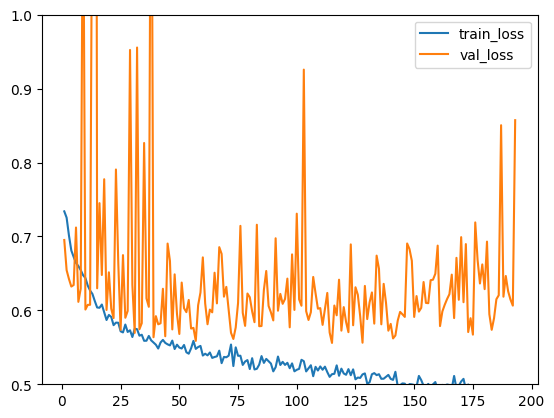

In [42]:
plt.plot(df["epoch"], df["loss_train"], label="train_loss")
plt.plot(df["epoch"], df["loss_val"], label="val_loss")
# plot the moving average of the validation loss
# plt.plot(df["epoch"], df["loss_train"].rolling(2).mean(), label="val_loss")

plt.legend()
plt.ylim(0.5, 1)

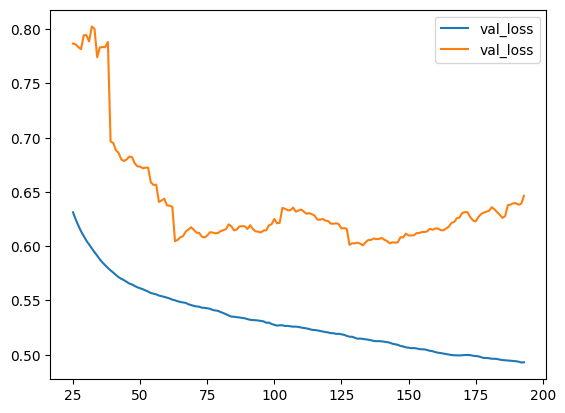

In [43]:
plt.plot(df["epoch"], df["loss_train"].rolling(25).mean(), label="val_loss")
plt.plot(df["epoch"], df["loss_val"].rolling(25).mean(), label="val_loss")

plt.legend()
# plt.ylim(0.05, 0.3)

(193, 16)


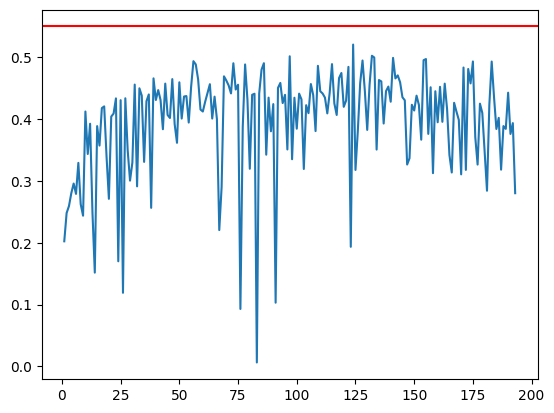

In [44]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
print(df_fbeta.shape)
df_fbeta = np.max(df_fbeta, axis=1)
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")

# put horizontal line at 0.55
plt.axhline(y=0.55, color='r', linestyle='-')


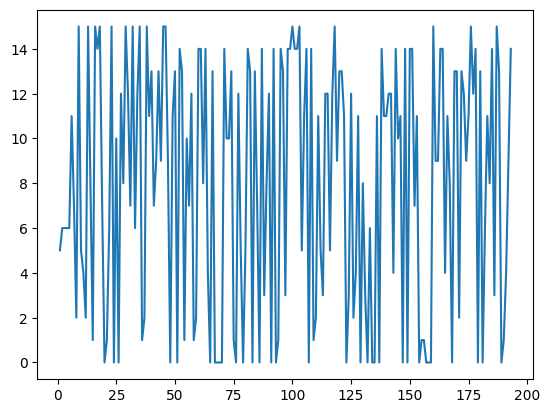

In [45]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
df_fbeta = np.argmax(df_fbeta, axis=1)
df_fbeta.shape
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")